## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  73.764715   676.508941  0.469208  1.632381  1.415358
1  20.854761   650.627758  0.580637  4.963948  1.549121
2  67.142927  1237.846508  0.710218  8.598889  1.467139
3  86.319034  1182.022781  0.388386  8.169115  1.358551
4  74.461432  1243.302798  0.701431  5.891466  1.451663


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0341877	total: 57.9ms	remaining: 57.8s
1:	learn: 1.0278576	total: 58.6ms	remaining: 29.3s
2:	learn: 1.0178421	total: 59.3ms	remaining: 19.7s
3:	learn: 1.0105396	total: 59.8ms	remaining: 14.9s
4:	learn: 1.0033611	total: 60.3ms	remaining: 12s
5:	learn: 0.9958186	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9859673	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9775445	total: 61.6ms	remaining: 7.64s
8:	learn: 0.9712145	total: 62.1ms	remaining: 6.83s
9:	learn: 0.9628129	total: 62.5ms	remaining: 6.19s
10:	learn: 0.9558231	total: 62.9ms	remaining: 5.66s
11:	learn: 0.9479974	total: 63.4ms	remaining: 5.22s
12:	learn: 0.9404213	total: 63.8ms	remaining: 4.85s
13:	learn: 0.9339044	total: 64.3ms	remaining: 4.53s
14:	learn: 0.9270068	total: 64.8ms	remaining: 4.25s
15:	learn: 0.9205364	total: 65.3ms	remaining: 4.01s
16:	learn: 0.9135639	total: 65.8ms	remaining: 3.81s
17:	learn: 0.9065773	total: 66.4ms	remaining: 3.62s
18:	learn: 0.9011097	total: 66.8ms	remaining: 

130:	learn: 0.4683340	total: 117ms	remaining: 773ms
131:	learn: 0.4655495	total: 117ms	remaining: 770ms
132:	learn: 0.4635202	total: 118ms	remaining: 766ms
133:	learn: 0.4609265	total: 118ms	remaining: 762ms
134:	learn: 0.4591786	total: 118ms	remaining: 758ms
135:	learn: 0.4572431	total: 119ms	remaining: 755ms
136:	learn: 0.4551314	total: 119ms	remaining: 751ms
137:	learn: 0.4530112	total: 120ms	remaining: 748ms
138:	learn: 0.4506575	total: 120ms	remaining: 745ms
139:	learn: 0.4485275	total: 121ms	remaining: 741ms
140:	learn: 0.4470019	total: 121ms	remaining: 739ms
141:	learn: 0.4449725	total: 122ms	remaining: 735ms
142:	learn: 0.4434009	total: 122ms	remaining: 733ms
143:	learn: 0.4414964	total: 123ms	remaining: 729ms
144:	learn: 0.4396097	total: 123ms	remaining: 726ms
145:	learn: 0.4378846	total: 124ms	remaining: 724ms
146:	learn: 0.4355500	total: 124ms	remaining: 720ms
147:	learn: 0.4328313	total: 125ms	remaining: 717ms
148:	learn: 0.4305665	total: 125ms	remaining: 714ms
149:	learn: 

285:	learn: 0.2644015	total: 185ms	remaining: 461ms
286:	learn: 0.2637835	total: 185ms	remaining: 461ms
287:	learn: 0.2631703	total: 187ms	remaining: 461ms
288:	learn: 0.2625065	total: 187ms	remaining: 461ms
289:	learn: 0.2618053	total: 188ms	remaining: 460ms
290:	learn: 0.2610931	total: 189ms	remaining: 459ms
291:	learn: 0.2594492	total: 189ms	remaining: 458ms
292:	learn: 0.2591689	total: 189ms	remaining: 457ms
293:	learn: 0.2584663	total: 190ms	remaining: 456ms
294:	learn: 0.2577082	total: 190ms	remaining: 455ms
295:	learn: 0.2571122	total: 190ms	remaining: 453ms
296:	learn: 0.2566096	total: 191ms	remaining: 452ms
297:	learn: 0.2555877	total: 191ms	remaining: 450ms
298:	learn: 0.2549881	total: 192ms	remaining: 450ms
299:	learn: 0.2546409	total: 192ms	remaining: 449ms
300:	learn: 0.2540149	total: 193ms	remaining: 447ms
301:	learn: 0.2532780	total: 193ms	remaining: 446ms
302:	learn: 0.2525326	total: 193ms	remaining: 445ms
303:	learn: 0.2518628	total: 194ms	remaining: 444ms
304:	learn: 

539:	learn: 0.1346191	total: 297ms	remaining: 253ms
540:	learn: 0.1340105	total: 298ms	remaining: 253ms
541:	learn: 0.1336167	total: 298ms	remaining: 252ms
542:	learn: 0.1330196	total: 299ms	remaining: 251ms
543:	learn: 0.1324336	total: 299ms	remaining: 251ms
544:	learn: 0.1320388	total: 300ms	remaining: 250ms
545:	learn: 0.1314630	total: 300ms	remaining: 250ms
546:	learn: 0.1310744	total: 301ms	remaining: 249ms
547:	learn: 0.1305086	total: 301ms	remaining: 248ms
548:	learn: 0.1301534	total: 302ms	remaining: 248ms
549:	learn: 0.1295982	total: 302ms	remaining: 247ms
550:	learn: 0.1292474	total: 302ms	remaining: 246ms
551:	learn: 0.1288706	total: 303ms	remaining: 246ms
552:	learn: 0.1283251	total: 303ms	remaining: 245ms
553:	learn: 0.1279818	total: 304ms	remaining: 244ms
554:	learn: 0.1274463	total: 304ms	remaining: 244ms
555:	learn: 0.1271072	total: 304ms	remaining: 243ms
556:	learn: 0.1267418	total: 305ms	remaining: 242ms
557:	learn: 0.1262155	total: 305ms	remaining: 242ms
558:	learn: 

697:	learn: 0.0860211	total: 366ms	remaining: 158ms
698:	learn: 0.0857612	total: 367ms	remaining: 158ms
699:	learn: 0.0854683	total: 367ms	remaining: 157ms
700:	learn: 0.0852083	total: 368ms	remaining: 157ms
701:	learn: 0.0849549	total: 368ms	remaining: 156ms
702:	learn: 0.0847611	total: 368ms	remaining: 156ms
703:	learn: 0.0845694	total: 369ms	remaining: 155ms
704:	learn: 0.0843285	total: 369ms	remaining: 154ms
705:	learn: 0.0841388	total: 370ms	remaining: 154ms
706:	learn: 0.0839852	total: 370ms	remaining: 153ms
707:	learn: 0.0837973	total: 370ms	remaining: 153ms
708:	learn: 0.0836116	total: 371ms	remaining: 152ms
709:	learn: 0.0833533	total: 371ms	remaining: 152ms
710:	learn: 0.0830735	total: 372ms	remaining: 151ms
711:	learn: 0.0829245	total: 372ms	remaining: 151ms
712:	learn: 0.0826496	total: 373ms	remaining: 150ms
713:	learn: 0.0823995	total: 373ms	remaining: 150ms
714:	learn: 0.0821382	total: 374ms	remaining: 149ms
715:	learn: 0.0819121	total: 374ms	remaining: 148ms
716:	learn: 

948:	learn: 0.0483279	total: 478ms	remaining: 25.7ms
949:	learn: 0.0482528	total: 479ms	remaining: 25.2ms
950:	learn: 0.0481787	total: 479ms	remaining: 24.7ms
951:	learn: 0.0481069	total: 480ms	remaining: 24.2ms
952:	learn: 0.0480760	total: 480ms	remaining: 23.7ms
953:	learn: 0.0480052	total: 481ms	remaining: 23.2ms
954:	learn: 0.0477975	total: 481ms	remaining: 22.7ms
955:	learn: 0.0477253	total: 481ms	remaining: 22.2ms
956:	learn: 0.0476560	total: 482ms	remaining: 21.7ms
957:	learn: 0.0476257	total: 482ms	remaining: 21.1ms
958:	learn: 0.0475012	total: 483ms	remaining: 20.6ms
959:	learn: 0.0474602	total: 483ms	remaining: 20.1ms
960:	learn: 0.0473691	total: 484ms	remaining: 19.6ms
961:	learn: 0.0473393	total: 484ms	remaining: 19.1ms
962:	learn: 0.0472146	total: 485ms	remaining: 18.6ms
963:	learn: 0.0471301	total: 485ms	remaining: 18.1ms
964:	learn: 0.0470140	total: 486ms	remaining: 17.6ms
965:	learn: 0.0469846	total: 486ms	remaining: 17.1ms
966:	learn: 0.0469147	total: 487ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


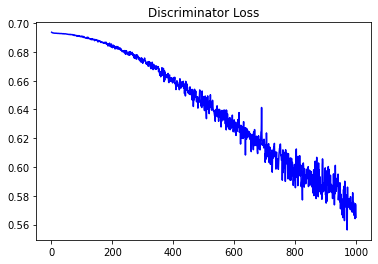

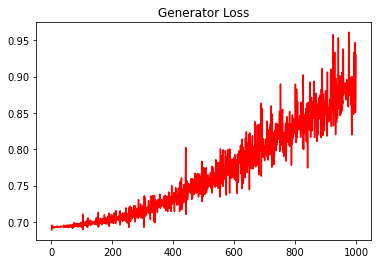

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.4008727733226482


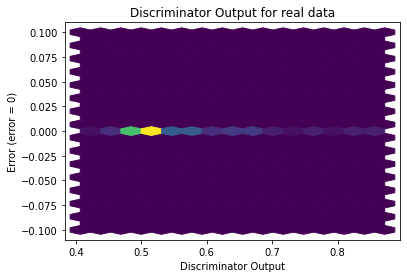

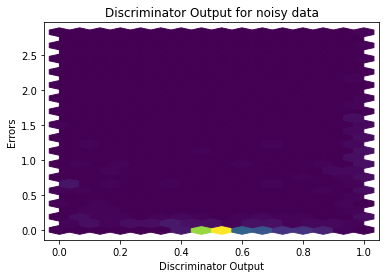

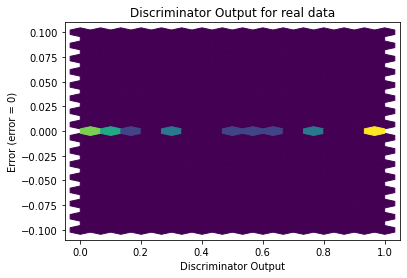

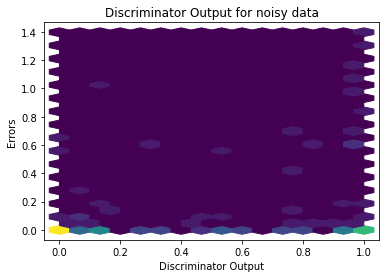

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
